Problem 1
Using SQL compute a relation containing the total payroll and winning percentage (number of wins / number of games * 100) for each team (that is, for each teamID and yearID combination). You should include other columns that will help when performing EDA later on (e.g., franchise ids, number of wins, number of games).

Include the SQL code you used to create this relation in your writeup. Describe how you dealt with any missing data in these two relations. Specifically, indicate if there is missing data in either table, and how the type of join you used determines how you dealt with this missing data. One note, for SQL you have to be mindful of integer vs. float division.

Prepare and knit an Jupyter notebook that includes for each Problem: (a) code to carry out the step discussed, (b) output showing the result of your code, and (c) a short prose description of how your code works. Remember, the writeup you are preparing is intended to communicate your data analysis effectively. Thoughtlessly showing large amounts of output in your writeup defeats that purpose.

All axes in plots should be labeled in an informative manner. Your answers to any question that refers to a plot should include both (a) a text description of your plot, and (b) a sentence or two of interpretation as it relates to the question asked.

In [ ]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

#Database from https://github.com/jknecht/baseball-archive-sqlite

sqlite_file = '/content/drive/MyDrive/lahman_1871-2022.sqlite'
conn = sqlite3.connect(sqlite_file)

#imported relevant packages
#Created sqlite_file tied to location in my google drive
#conn creates a connection to the sql database




In [ ]:
#SQL query to gather relevant data for the assignment
#pd.read_sql to create a dataframe from the query
#printout of dataframe

sql_query = """
SELECT t.teamID, t.yearID, t.franchID, t.G, t.W, sum(s.salary) AS total_payroll, (t.W * 100.0 / t.G) AS win_percentage
FROM teams t
JOIN salaries s ON t.teamID = s.teamID AND t.yearID = s.yearID
GROUP BY t.yearID, t.teamID;

"""

sql_df = pd.read_sql(sql_query, conn)

print(sql_df)


    teamID  yearID franchID    G   W  total_payroll  win_percentage
0      ATL    1985      ATL  162  66     14807000.0       40.740741
1      BAL    1985      BAL  161  83     11560712.0       51.552795
2      BOS    1985      BOS  163  81     10897560.0       49.693252
3      CAL    1985      ANA  162  90     14427894.0       55.555556
4      CHA    1985      CHW  163  85      9846178.0       52.147239
..     ...     ...      ...  ...  ..            ...             ...
913    SLN    2016      STL  162  86    143053500.0       53.086420
914    TBA    2016      TBD  162  68     57097310.0       41.975309
915    TEX    2016      TEX  162  95    176038723.0       58.641975
916    TOR    2016      TOR  162  89    138701700.0       54.938272
917    WAS    2016      WSN  162  95    141652646.0       58.641975

[918 rows x 7 columns]


Problem 1:

My SQL query is as follows:
SELECT t.teamID, t.yearID, t.franchID, t.G, t.W, sum(s.salary) AS total_payroll, (t.W * 100.0 / t.G) AS win_percentage
FROM teams t
JOIN salaries s ON t.teamID = s.teamID AND t.yearID = s.yearID
GROUP BY t.yearID, t.teamID;

This gathered the relevant columns from teams, added the total_payroll from the salaries table, created a win_percentage column.

The salaries table is missing data from beyond 1985 and after 2016. Joining salaries where teams yearID = salaries yearID limited the table to the non-missing entries. Searching the files on the github link did not show any new data past 2016.

In [ ]:
#Created a copy of the sql_df and filtered out years not between 1990-2022 for use later in assignment

means_df = sql_df.copy()
means_df = means_df[means_df['yearID'] >= 1990]
print(means_df)

    teamID  yearID franchID    G   W  total_payroll  win_percentage
130    ATL    1990      ATL  162  65     14555501.0       40.123457
131    BAL    1990      BAL  161  76      9680084.0       47.204969
132    BOS    1990      BOS  162  88     20558333.0       54.320988
133    CAL    1990      ANA  162  80     21720000.0       49.382716
134    CHA    1990      CHW  162  94      9491500.0       58.024691
..     ...     ...      ...  ...  ..            ...             ...
913    SLN    2016      STL  162  86    143053500.0       53.086420
914    TBA    2016      TBD  162  68     57097310.0       41.975309
915    TEX    2016      TEX  162  95    176038723.0       58.641975
916    TOR    2016      TOR  162  89    138701700.0       54.938272
917    WAS    2016      WSN  162  95    141652646.0       58.641975

[788 rows x 7 columns]


Problem 2
Write code to produce plots that illustrate the distribution of payrolls across teams conditioned on time (from 1990-2022).

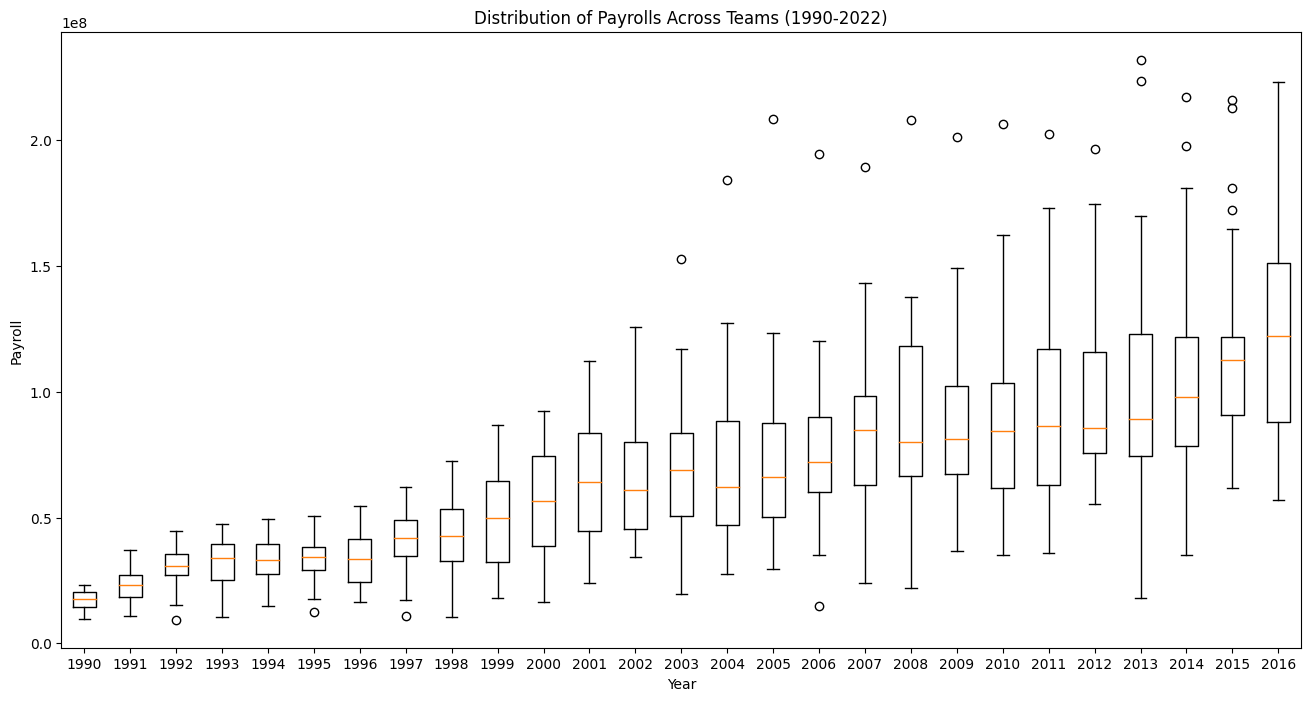

In [ ]:
#Plot of payrolls from 1990-2022

plt.figure(figsize=(16, 8))
plt.boxplot([group['total_payroll'].values for year, group in means_df.groupby('yearID')],
            labels=means_df['yearID'].unique())
plt.xlabel('Year')
plt.ylabel('Payroll')
plt.title('Distribution of Payrolls Across Teams (1990-2022)')
plt.show()

Question 1: What statements can you make about the distribution of payrolls conditioned on time based on these plots? Remember you can make statements in terms of central tendency, spread, etc.

The distribution of payroll has had a tendency to increase over time.
The spread of total payroll has increased over time.

Problem 3

Write code to produce plots that specifically show at least one of the statements you made in Question 1. For example, if you make a statement that there is a trend for payrolls to decrease over time, make a plot of a statistic for central tendency (e.g., mean payroll) vs. time to show that specficially.

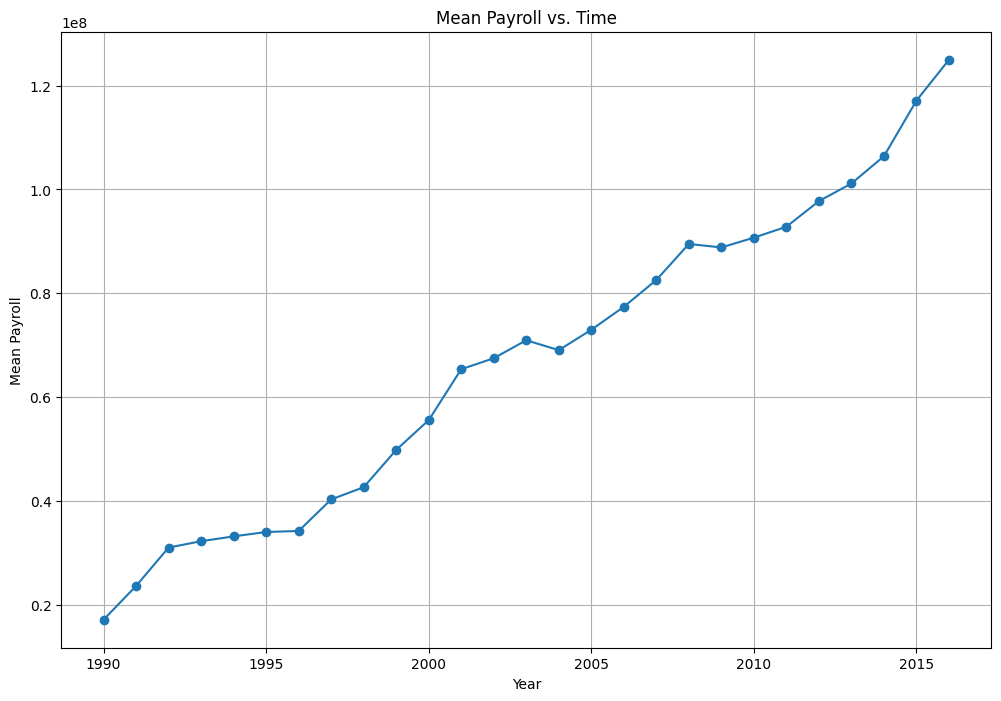

In [ ]:
#Mean Payroll over Time plot
mean_payroll_by_year = means_df.groupby('yearID')['total_payroll'].mean().reset_index()

plt.figure(figsize=(12, 8))
plt.plot(mean_payroll_by_year['yearID'], mean_payroll_by_year['total_payroll'], marker='o')
plt.xlabel('Year')
plt.ylabel('Mean Payroll')
plt.title('Mean Payroll vs. Time')
plt.grid(True)
plt.show()

Problem 4

Write code to discretize year into five time periods (you can use pandas.cut to accomplish this) and then make a scatterplot showing mean winning percentage (y-axis) vs. mean payroll (x-axis) for each of the five time periods. You could add a regression line (using, e.g., NumPy's polyfit) in each scatter plot to ease interpretation.

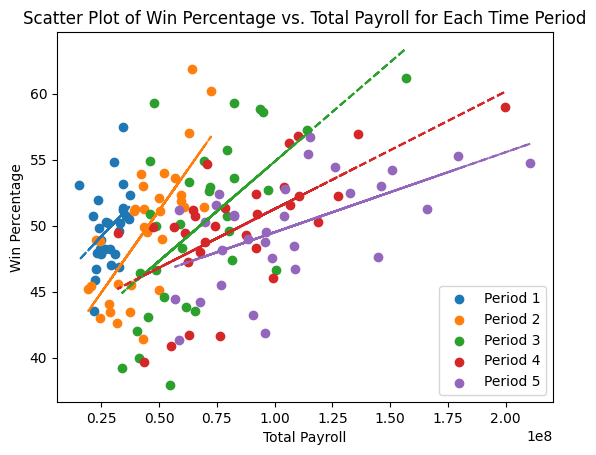

In [ ]:
#Scatter plot

#I had issues creating a regression line due to missing values so added a line of code to drop rows with missing values

#Discretize
means_df['time_period'] = pd.cut(means_df['yearID'], bins=5, labels=['Period 1', 'Period 2', 'Period 3', 'Period 4', 'Period 5'])

team_period_mean_data = means_df.groupby(['teamID', 'time_period']).agg({'total_payroll': 'mean', 'win_percentage': 'mean'}).reset_index()

for period in team_period_mean_data['time_period'].unique():
    period_data = team_period_mean_data[team_period_mean_data['time_period'] == period]

    #Drop rows with missing values
    period_data = period_data.dropna(subset=['total_payroll', 'win_percentage'])

    if not period_data.empty:
        #Regression line
        coef = np.polyfit(period_data['total_payroll'], period_data['win_percentage'], 1)
        poly1d_fn = np.poly1d(coef)

        #Scatter plot
        plt.scatter(period_data['total_payroll'], period_data['win_percentage'], label=period)

        #Regression line plot
        plt.plot(period_data['total_payroll'], poly1d_fn(period_data['total_payroll']), '--')


plt.xlabel('Total Payroll')
plt.ylabel('Win Percentage')
plt.title('Scatter Plot of Win Percentage vs. Total Payroll for Each Time Period')
plt.legend()
plt.show()

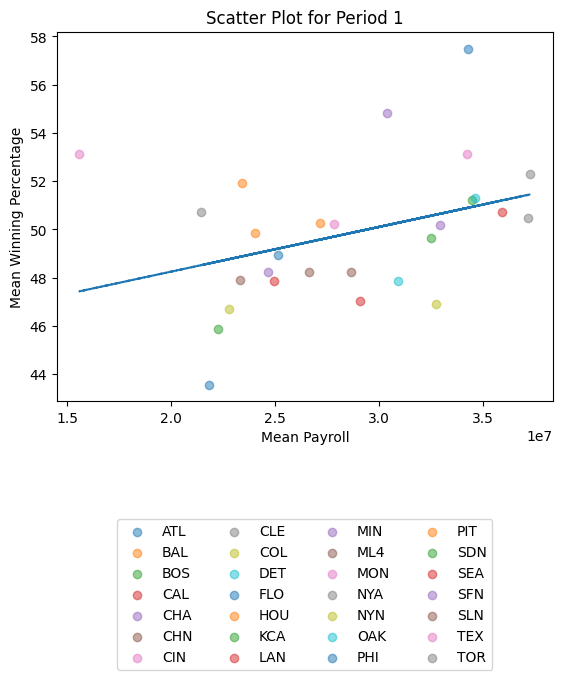

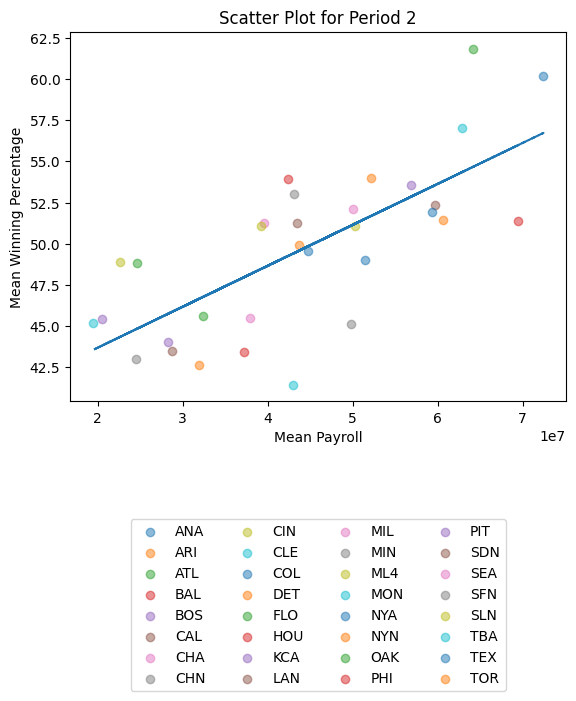

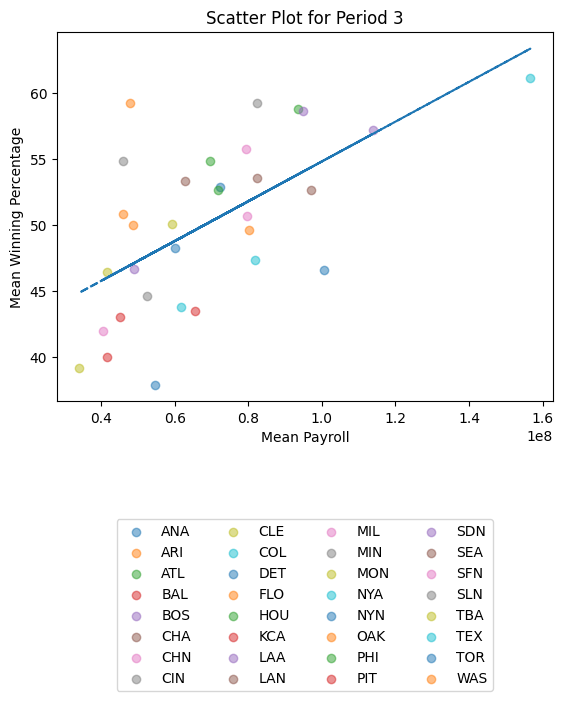

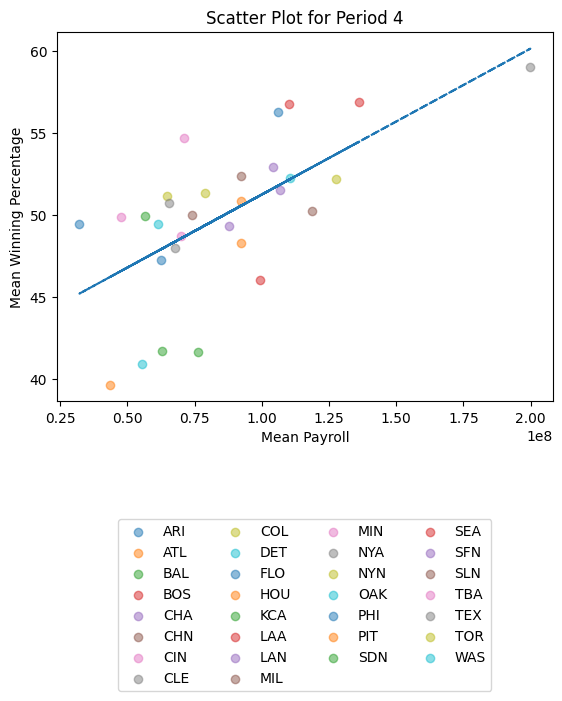

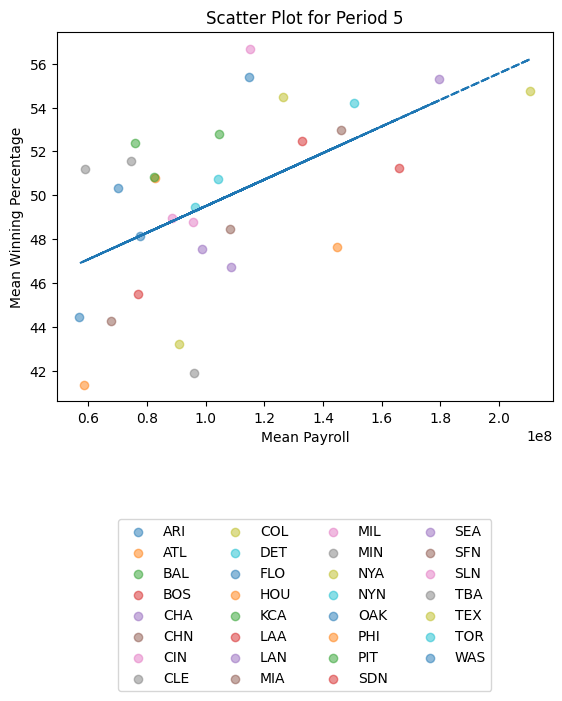

In [ ]:
#The above plot is a bit difficult to read so I created separate plots for each period
#Added a for loop to do so
#Rest of the code is the same as above

means_df['time_period'] = pd.cut(means_df['yearID'], bins=5, labels=['Period 1', 'Period 2', 'Period 3', 'Period 4', 'Period 5'])

for period in team_period_mean_data['time_period'].unique():
    period_data = team_period_mean_data[team_period_mean_data['time_period'] == period]

    period_data = period_data.dropna(subset=['total_payroll', 'win_percentage'])

    if not period_data.empty:
        coef = np.polyfit(period_data['total_payroll'], period_data['win_percentage'], 1)
        poly1d_fn = np.poly1d(coef)
#creates individual plots for periods
    for team in period_data['teamID'].unique():
        team_data = period_data[period_data['teamID'] == team]
        plt.scatter(team_data['total_payroll'], team_data['win_percentage'], label=team, alpha=0.5)

    plt.plot(period_data['total_payroll'], poly1d_fn(period_data['total_payroll']), '--')

    plt.xlabel('Mean Payroll')
    plt.ylabel('Mean Winning Percentage')
    plt.title(f'Scatter Plot for {period}')
    plt.legend(bbox_to_anchor=(0.5, -0.3), loc='upper center', ncol=4)
    plt.show()


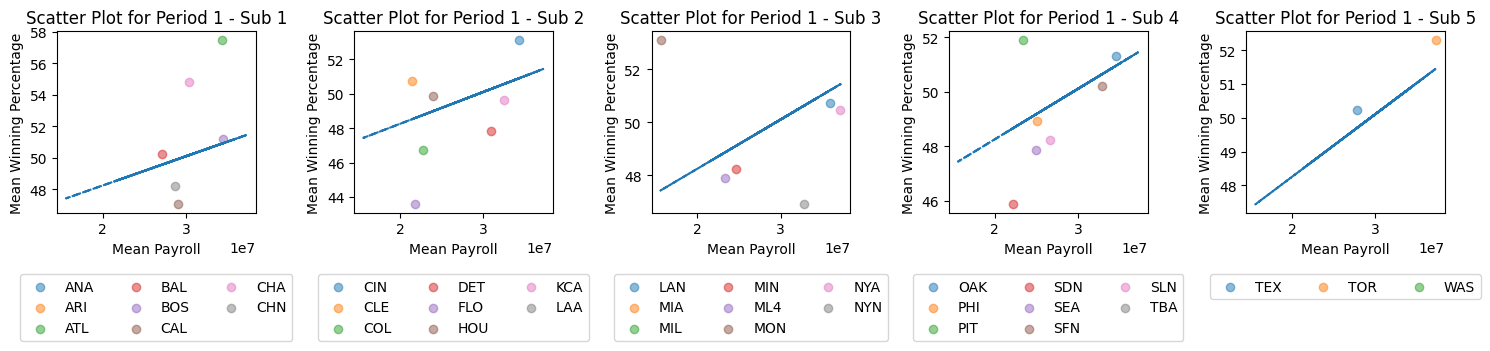

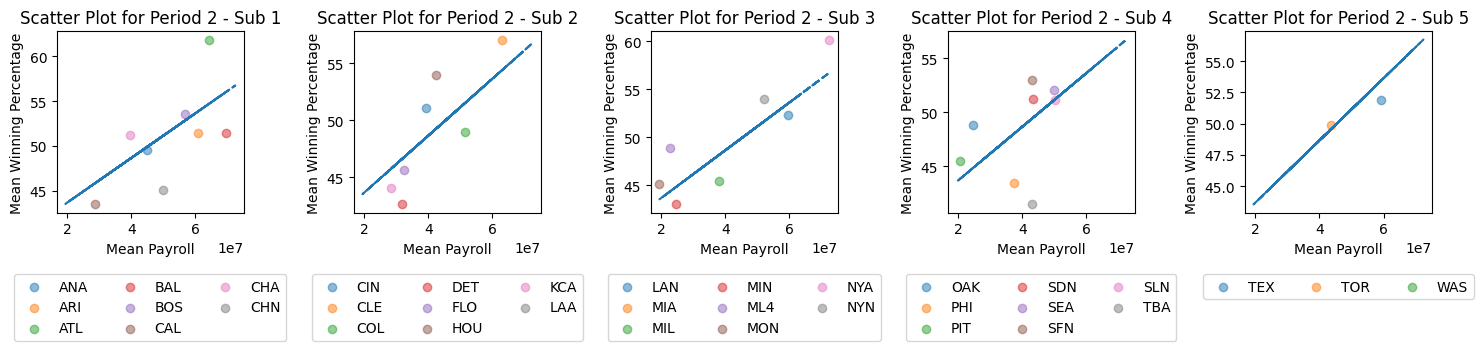

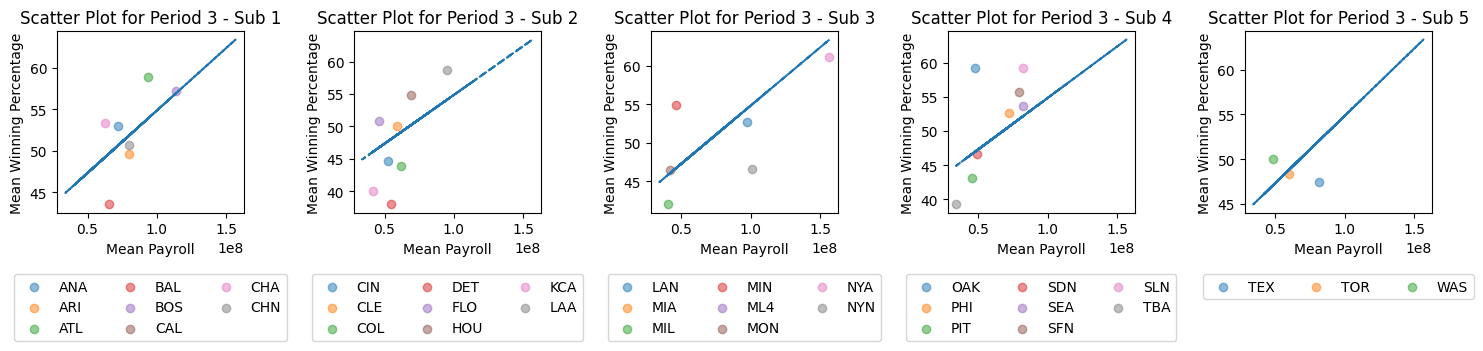

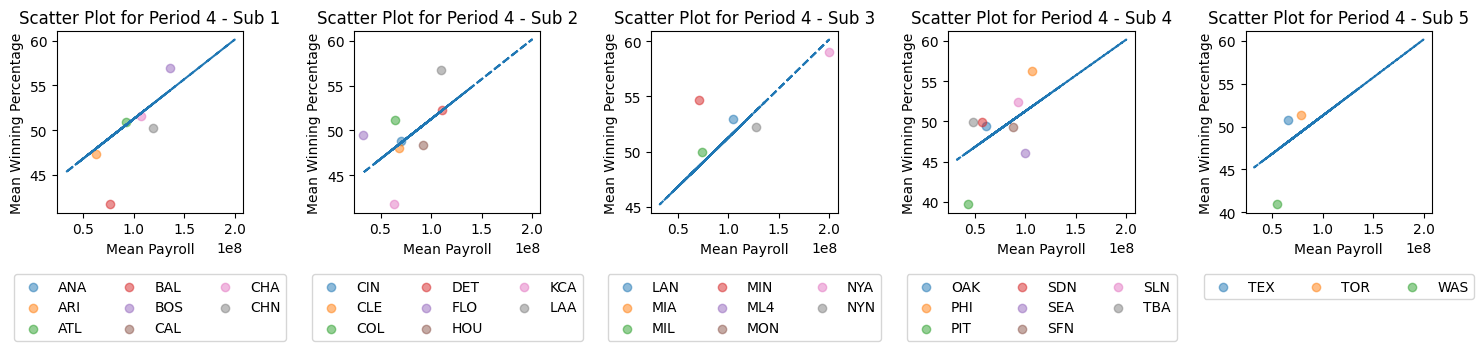

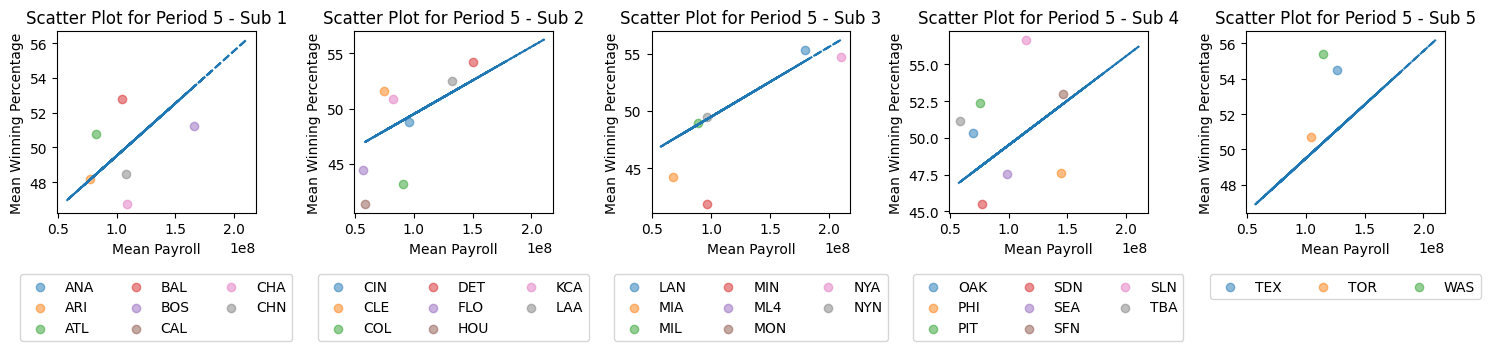

In [ ]:
#It is still difficult to see teams that standout so I have divided each period into subplots containing fewer teams
#Added another for loop to create smaller plots with less teams
#Rest of the code is the same

means_df['time_period'] = pd.cut(means_df['yearID'], bins=5, labels=['Period 1', 'Period 2', 'Period 3', 'Period 4', 'Period 5'])

teams_per_subplot = 8


for period in team_period_mean_data['time_period'].unique():
    period_data = team_period_mean_data[team_period_mean_data['time_period'] == period]

    unique_teams = period_data['teamID'].unique()

    num_subplots = int(np.ceil(len(unique_teams) / teams_per_subplot))

    fig, axes = plt.subplots(1, num_subplots, figsize=(15, 4))
#Creates individual plots for smaller # of teams
    for i, ax in enumerate(axes):
        start_idx = i * teams_per_subplot
        end_idx = (i + 1) * teams_per_subplot
        teams_to_plot = unique_teams[start_idx:end_idx]


        period_data = period_data.dropna(subset=['total_payroll', 'win_percentage'])

        if not period_data.empty:
            coef = np.polyfit(period_data['total_payroll'], period_data['win_percentage'], 1)
            poly1d_fn = np.poly1d(coef)



        for team in teams_to_plot:
            team_data = period_data[period_data['teamID'] == team]
            ax.scatter(team_data['total_payroll'], team_data['win_percentage'], label=team, alpha=0.5)


        ax.plot(period_data['total_payroll'], poly1d_fn(period_data['total_payroll']), '--')


        ax.set_xlabel('Mean Payroll')
        ax.set_ylabel('Mean Winning Percentage')
        ax.set_title(f'Scatter Plot for {period} - Sub {i+1}')
        ax.legend(bbox_to_anchor=(0.5, -0.3), loc='upper center', ncol=3)


    plt.tight_layout()
    plt.show()


Question 2
What can you say about team payrolls across these periods? Are there any teams that standout as being particularly good at paying for wins across these time periods? What can you say about the Oakland A's spending efficiency across these time periods (labeling points in the scatterplot can help interpretation).

Period 1: MON, PIT stand out for spending less while achieving high win %

Period 2: ATL, CLE, NYA stand out for high win %, but high spending. SFN, SDN, HOU achieve fair win % while spending less.

Period 3: OAK stands out as the best this period. ATL and FLO do well.

Period 4: MIN, BOS, OAK, PIT, TBA, CLE, PHI all do well. Nobody stands out.

Period 5: SLN and WAS standout.

OAK: In period 1, OAK spent a comparably considerable amount, but performed well. Period 2, OAK's spending decreased, but so did their wins. Period 3 shows great results for OAK in their spending and win %. But period 4 and 5 show a decline in performance, likely due to other teams improving their efficiencies.

Problem 5
Create a new variable in your dataset that standardizes payroll conditioned on year. So, this column for team i in year j should equal:

In [ ]:
#Creating the new variable by getting the mean of total payroll and then standardizing payroll for teams based on year, instead of periods

means_df['avg_payroll'] = means_df.groupby('yearID')['total_payroll'].transform('mean')
means_df['std_payroll'] = means_df.groupby('yearID')['total_payroll'].transform('std')
means_df['standardized_payroll'] = (means_df['total_payroll'] - means_df['avg_payroll']) / means_df['std_payroll']
means_df



Problem 6
Repeat the same plots as Problem 4, but use this new standardized payroll variable.

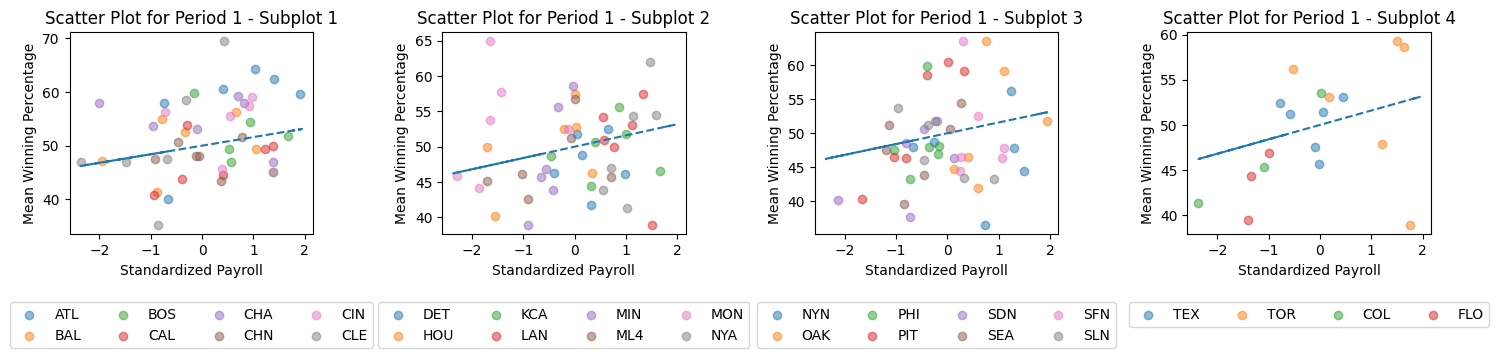

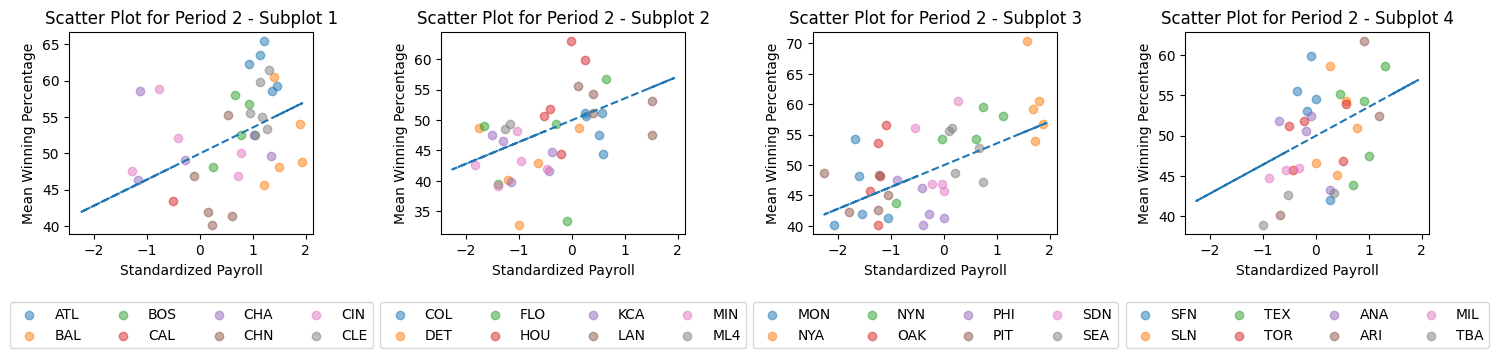

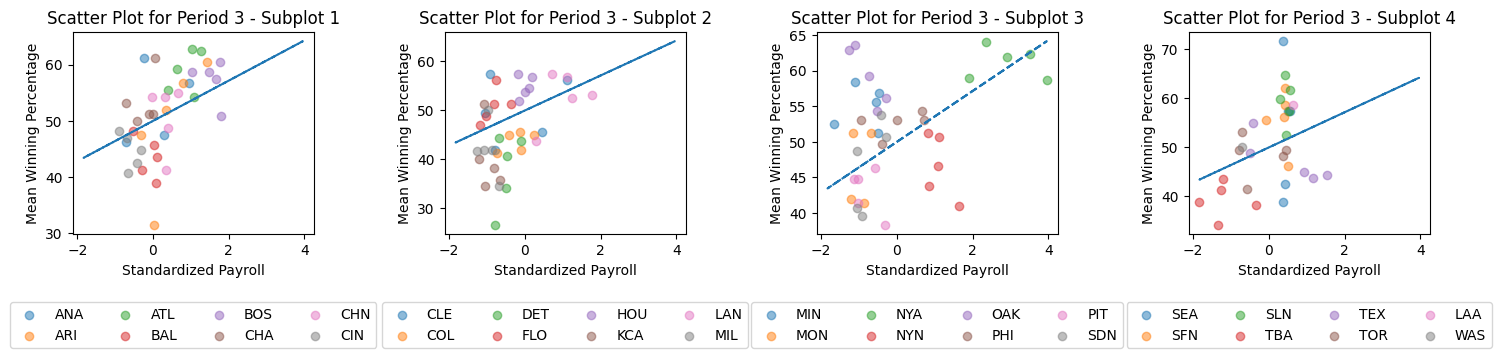

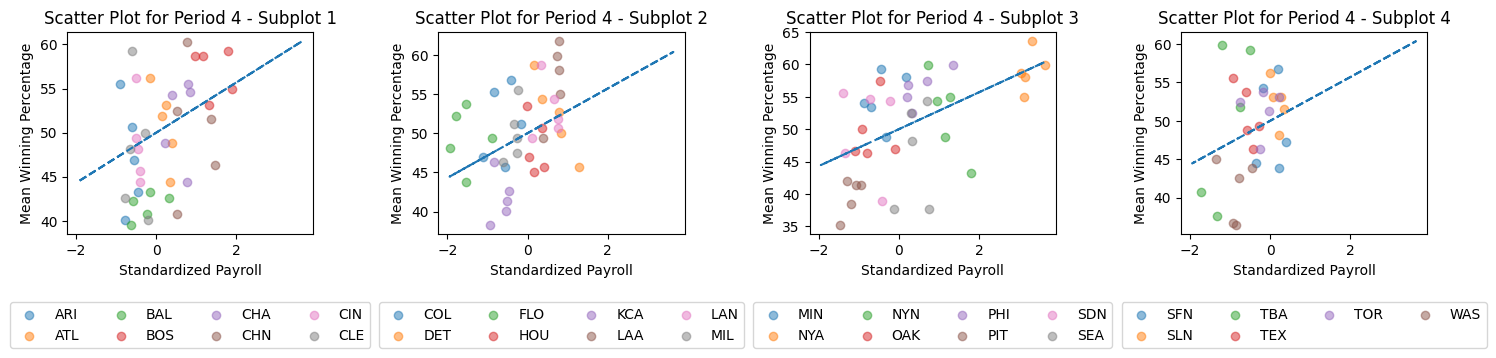

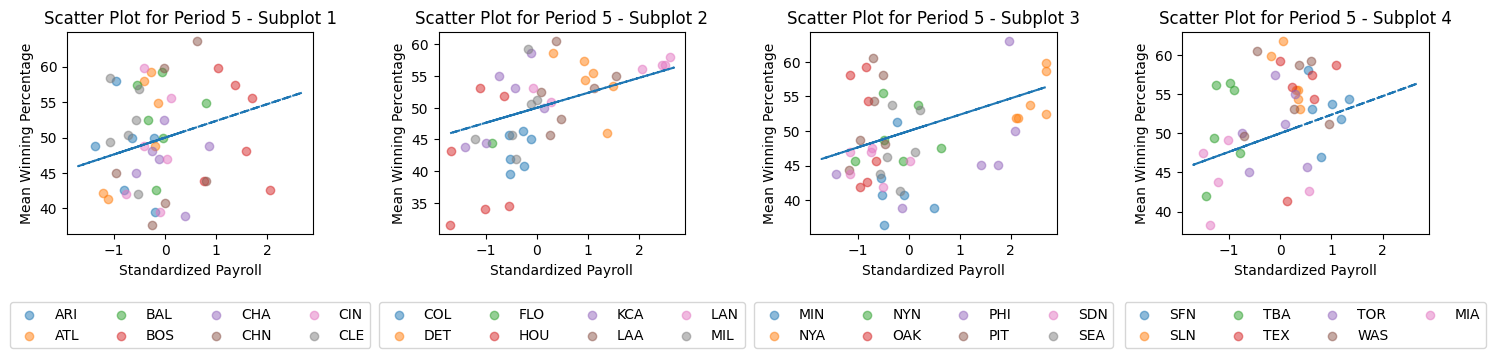

In [ ]:
#Repeat of individual scatterplots. Code is the same except means_df is used with 'standardized_payroll' is used instead of 'total_payroll' and team_period_mean_data
#Removes code that removes dropped rows as missing values are not an issue

teams_per_subplot = 8


for period in means_df['time_period'].unique():
    period_data = means_df[means_df['time_period'] == period]


    unique_teams = period_data['teamID'].unique()


    num_subplots = int(np.ceil(len(unique_teams) / teams_per_subplot))


    fig, axes = plt.subplots(1, num_subplots, figsize=(15, 4))  # Adjust figsize as needed


    for i, ax in enumerate(axes):
        start_idx = i * teams_per_subplot
        end_idx = (i + 1) * teams_per_subplot
        teams_to_plot = unique_teams[start_idx:end_idx]


        coef = np.polyfit(period_data['standardized_payroll'], period_data['win_percentage'], 1)
        poly1d_fn = np.poly1d(coef)


        for team in teams_to_plot:
            team_data = period_data[period_data['teamID'] == team]
            ax.scatter(team_data['standardized_payroll'], team_data['win_percentage'], label=team, alpha=0.5)


        ax.plot(period_data['standardized_payroll'], poly1d_fn(period_data['standardized_payroll']), '--')


        ax.set_xlabel('Standardized Payroll')
        ax.set_ylabel('Mean Winning Percentage')
        ax.set_title(f'Scatter Plot for {period} - Subplot {i+1}')
        ax.legend(bbox_to_anchor=(0.5, -0.3), loc='upper center', ncol=4)

    plt.tight_layout()
    plt.show()


Question 3
Discuss how the plots from Problem 4 and Problem 6 reflect the transformation you did on the payroll variable.

The transformation of payroll to a standardized payroll caused the plots to become more evenly distributed and easier to visualize successful teams.

Problem 7

Make a single scatter plot of winning percentage (y-axis) vs. standardized payroll (x-axis). Add a regression line to highlight the relationship.

The regression line gives you expected winning percentage as a function of standardized payroll. Looking at the regression line, it looks like teams that spend roughly the average payroll in a given year will win 50% of their games (i.e. win_pct is 50 when standardized_payroll is 0), and teams increase 5% wins for every 2 standard units of payroll (i.e., win_pct is 55 when standardized_payroll is 2). We will see how this is done in general using linear regression later in the course.

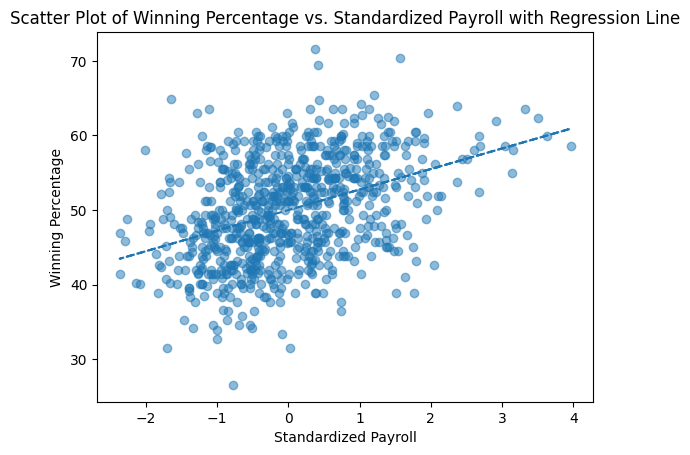

In [ ]:
#Problem 7

coef = np.polyfit(means_df['standardized_payroll'], means_df['win_percentage'], 1)
poly1d_fn = np.poly1d(coef)


plt.scatter(means_df['standardized_payroll'], means_df['win_percentage'], alpha=0.5)


plt.plot(means_df['standardized_payroll'], poly1d_fn(means_df['standardized_payroll']), '--')


plt.xlabel('Standardized Payroll')
plt.ylabel('Winning Percentage')
plt.title('Scatter Plot of Winning Percentage vs. Standardized Payroll with Regression Line')
plt.show()


Problem 8

Make a line plot with year on the x-axis and efficiency on the y-axis. A good set of teams to plot are Oakland, the New York Yankees, Boston, Atlanta and Tampa Bay (teamIDs OAK, BOS, NYA, ATL, TBA).



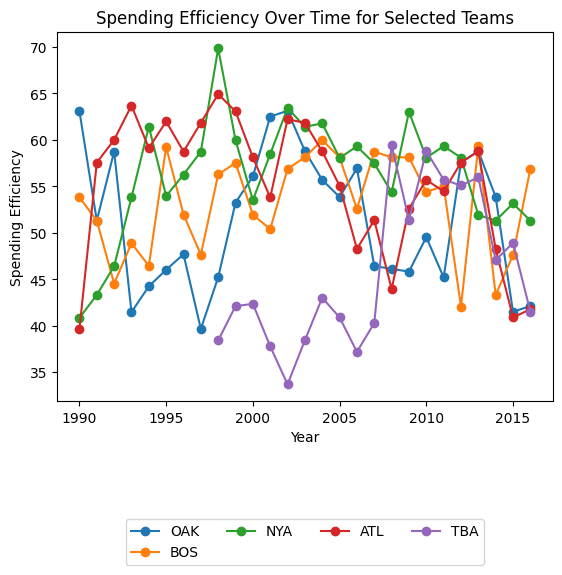

In [ ]:
#Problem 8
#Expected win percentage
means_df['expected_win_percentage'] = .50 + .025 * means_df['standardized_payroll']

#Spending efficiency
means_df['spending_efficiency'] = means_df['win_percentage'] - means_df['expected_win_percentage']

#Teams
teams_of_interest = ['OAK', 'BOS', 'NYA', 'ATL', 'TBA']
selected_teams = means_df[means_df['teamID'].isin(teams_of_interest)]

#Plot
for team in teams_of_interest:
    team_data = selected_teams[selected_teams['teamID'] == team]
    plt.plot(team_data['yearID'], team_data['spending_efficiency'], marker='o', label=team)

plt.xlabel('Year')
plt.ylabel('Spending Efficiency')
plt.title('Spending Efficiency Over Time for Selected Teams')
plt.legend(bbox_to_anchor=(0.5, -0.3), loc='upper center', ncol=4)
plt.show()


Question 4
What can you learn from this plot compared to the set of plots you looked at in Question 2 and 3?

This plot is useful in getting a clearer idea on how efficient teams were in their spending to gain wins over time. Compared to the other plots, it is much easier to track a specific team's efficiency.

How good was Oakland's efficiency during the Moneyball period?

See Below


In [ ]:
oak_df = means_df[means_df['teamID'] == 'OAK']
oak_df

yearID teamID franchID    G    W  win_percentage       salary  \
10     1990    OAK      OAK  162  103        0.635802   23361084.0   
36     1991    OAK      OAK  162   84        0.518519   26319834.0   
62     1992    OAK      OAK  162   96        0.592593   33893834.0   
88     1993    OAK      OAK  162   68        0.419753   19330545.0   
116    1994    OAK      OAK  114   51        0.447368   21633000.0   
144    1995    OAK      OAK  144   67        0.465278   24515781.0   
172    1996    OAK      OAK  162   78        0.481481   31022500.0   
200    1997    OAK      OAK  162   65        0.401235   48692500.0   
227    1998    OAK      OAK  162   74        0.456790   50484648.0   
257    1999    OAK      OAK  162   87        0.537037   61935837.0   
287    2000    OAK      OAK  161   91        0.565217   61111190.0   
317    2001    OAK      OAK  162  102        0.629630   71541334.0   
347    2002    OAK      OAK  162  103        0.635802   56851043.0   
377    2003    OAK      OAK  162   96        0.592593   67179667.0   
407    2004    OAK      OAK  162   91        0.561728   65445167.0   
437    2005    OAK      OAK  162   88        0.543210   69092000.0   
467    2006    OAK      OAK  162   93        0.574074   82612866.0   
497    2007    OAK      OAK  162   76        0.469136   94800369.0   
527    2008    OAK      OAK  161   75        0.465839  137685196.0   
557    2009    OAK      OAK  162   75        0.462963  115085145.0   
587    2010    OAK      OAK  162   81        0.500000  122864928.0   
617    2011    OAK      OAK  162   74        0.456790  105700231.0   
647    2012    OAK      OAK  162   94        0.580247  132300000.0   
678    2013    OAK      OAK  162   96        0.592593   17890700.0   
708    2014    OAK      OAK  162   88        0.543210   35116300.0   
738    2015    OAK      OAK  162   68        0.419753   72256200.0   
768    2016    OAK      OAK  162   69        0.425926   94893700.0   

    time_period   avg_payroll   std_payroll  standardized_payroll  \
10     Period 1  1.707235e+07  3.771834e+06              1.667287   
36     Period 1  2.357879e+07  6.894669e+06              0.397561   
62     Period 1  3.098244e+07  9.150607e+06              0.318165   
88     Period 1  3.220500e+07  9.232485e+06             -1.394474   
116    Period 1  3.313701e+07  8.528749e+06             -1.348851   
144    Period 1  3.398105e+07  9.447998e+06             -1.001828   
172    Period 2  3.417798e+07  1.068853e+07             -0.295221   
200    Period 2  4.026021e+07  1.306073e+07              0.645622   
227    Period 2  4.260943e+07  1.538081e+07              0.512016   
257    Period 2  4.980762e+07  2.056133e+07              0.589855   
287    Period 2  5.553784e+07  2.141622e+07              0.260240   
317    Period 3  6.535544e+07  2.470771e+07              0.250363   
347    Period 3  6.746925e+07  2.469219e+07             -0.430023   
377    Period 3  7.094207e+07  2.801196e+07             -0.134314   
407    Period 3  6.902220e+07  3.282411e+07             -0.108976   
437    Period 3  7.295711e+07  3.417478e+07             -0.113098   
467    Period 4  7.738242e+07  3.226495e+07              0.162109   
497    Period 4  8.255630e+07  3.390705e+07              0.361107   
527    Period 4  8.949529e+07  3.780200e+07              1.274798   
557    Period 4  8.882423e+07  3.385709e+07              0.775640   
587    Period 4  9.071200e+07  3.811503e+07              0.843576   
617    Period 5  9.281684e+07  4.081197e+07              0.315677   
647    Period 5  9.775804e+07  3.681754e+07              0.938193   
678    Period 5  1.011509e+08  4.883029e+07             -1.705092   
708    Period 5  1.064106e+08  4.250538e+07             -1.677300   
738    Period 5  1.171381e+08  4.037167e+07             -1.111717   
768    Period 5  1.250046e+08  4.663199e+07             -0.645713   

     expected_win_percentage  spending_efficiency  
10                  0.541682             0.094120  
36     

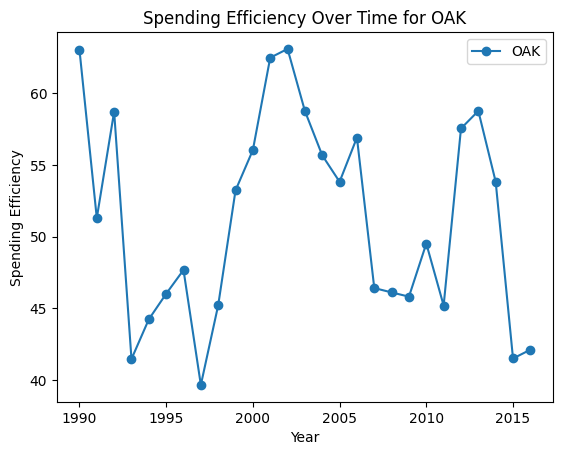

In [ ]:
#OAK Efficiency
means_df['expected_win_percentage'] = .50 + .025 * means_df['standardized_payroll']

means_df['spending_efficiency'] = means_df['win_percentage'] - means_df['expected_win_percentage']

teams_of_interest = ['OAK']
selected_teams = means_df[means_df['teamID'].isin(teams_of_interest)]

for team in teams_of_interest:
    team_data = selected_teams[selected_teams['teamID'] == team]
    plt.plot(team_data['yearID'], team_data['spending_efficiency'], marker='o', label=team)

plt.xlabel('Year')
plt.ylabel('Spending Efficiency')
plt.title('Spending Efficiency Over Time for OAK')
plt.legend()
plt.show()


How good was Oakland's efficiency during the Moneyball period?

OAK was very successful leading up to the Moneyball period and had a bit of a decline afterwards, likely due to other teams becoming more efficient as well.

In [ ]:
team_period_mean_data = means_df.groupby(['teamID', 'time_period']).agg({'total_payroll': 'mean', 'win_percentage': 'mean'}).reset_index()

team_period_mean_data

teamID time_period  total_payroll  win_percentage
0      ANA    Period 1            NaN             NaN
1      ANA    Period 2   4.481720e+07       49.537037
2      ANA    Period 3   7.220579e+07       52.932099
3      ANA    Period 4            NaN             NaN
4      ANA    Period 5            NaN             NaN
..     ...         ...            ...             ...
170    WAS    Period 1            NaN             NaN
171    WAS    Period 2            NaN             NaN
172    WAS    Period 3   4.858150e+07       50.000000
173    WAS    Period 4   5.527590e+07       40.909439
174    WAS    Period 5   1.146065e+08       55.400915

[175 rows x 4 columns]